In [65]:
import wave
import os
import glob
import soundfile as sf
    
directory = '/Users/rogierlandman/from_Samsung/Samvaran_training_data/Syllables/'
os.chdir(directory)
wavefiles = glob.glob('*.wav')
print(wavefiles)
for wavefile in wavefiles:
    data, samplerate = sf.read(wavefile) 

        
        
        
        

['Tr10.wav', 'Ph14.wav', 'Ph15.wav', 'Chi1.wav', 'Tr11.wav', 'Tr13.wav', 'Chi20.wav', 'Chi3.wav', 'Ph17.wav', 'Ph16.wav', 'Chi2.wav', 'Tr12.wav', 'Tr16.wav', 'Chi19.wav', 'Chi6.wav', 'Ph12.wav', 'Ph13.wav', 'Chi7.wav', 'Chi18.wav', 'Tr17.wav', 'Tr15.wav', 'Chi5.wav', 'Tw8.wav', 'Ph11.wav', 'Ph10.wav', 'Tw9.wav', 'Chi4.wav', 'Tr14.wav', 'Tw17.wav', 'Ph8.wav', 'Tr2.wav', 'Tr3.wav', 'Ph9.wav', 'Tw16.wav', 'Tw14.wav', 'Tr1.wav', 'Tw15.wav', 'Tw11.wav', 'Tr4.wav', 'Tr5.wav', 'Tw10.wav', 'Tw12.wav', 'Tr7.wav', 'Tr6.wav', 'Tw13.wav', 'Ph1.wav', 'Ph2.wav', 'Tr8.wav', 'Tr9.wav', 'Ph3.wav', 'Tw20.wav', 'Tw18.wav', 'Ph7.wav', 'Ph6.wav', 'Tw19.wav', 'Ph4.wav', 'Ph5.wav', 'Tr19.wav', 'Chi16.wav', 'Chi9.wav', 'Tw4.wav', 'Ph20.wav', 'Tw5.wav', 'Chi8.wav', 'Chi17.wav', 'Tr18.wav', 'Chi15.wav', 'Tw7.wav', 'Tw6.wav', 'Chi14.wav', 'Chi10.wav', 'Tw2.wav', 'Tw3.wav', 'Chi11.wav', 'Tr20.wav', 'Chi13.wav', 'Tw1.wav', 'Ph18.wav', 'Ph19.wav', 'Chi12.wav']


In [27]:
import csv
import pandas as pd
import numpy as np

csv_file = '/Users/rogierlandman/from_Samsung/spec_images_syllables/bbigmat.csv' 
df = pd.read_csv(csv_file, header=None)
df = df.dropna().astype(np.float32)
#print(df.shape)

from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

df = df.replace([np.inf, -np.inf], np.nan)
imputer = SimpleImputer ( strategy = "median" )
imputer.fit(df)
Msub = imputer.transform(df)
scaler = MinMaxScaler()
Msub=scaler.fit_transform(df)
#transformer = FunctionTransformer(np.log1p)
#transformer.transform(df)

print(df.dtypes)

0     float32
1     float32
2     float32
3     float32
4     float32
5     float32
6     float32
7     float32
8     float32
9     float32
10    float32
11    float32
12    float32
13    float32
dtype: object


In [44]:
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]

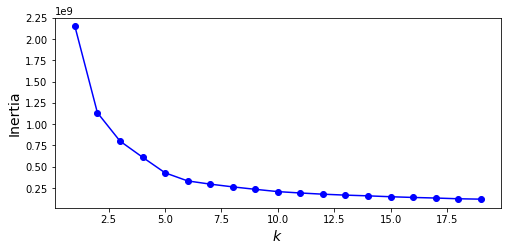

In [45]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='canberra',
     metric_kwds=None, min_dist=0.0, n_components=4, n_epochs=None,
     n_neighbors=10, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=True)
Construct fuzzy simplicial set
Wed Aug 19 15:53:15 2020 Finding Nearest Neighbors
Wed Aug 19 15:53:15 2020 Finished Nearest Neighbor Search
Wed Aug 19 15:53:15 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed 

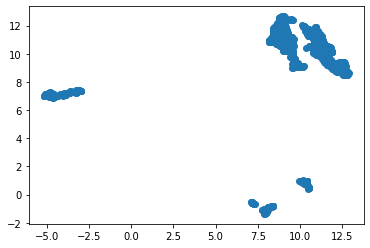

In [56]:
import umap
import matplotlib.pyplot as plt

n_neighbors=10
min_dist=0.0
n_components=4
metric='euclidean'
metric='canberra'

fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        verbose=True
    )
embedding = fit.fit_transform(df);

plt.scatter(embedding[:,0], embedding[:,1])
plt.show()

In [57]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9, random_state=0).fit(embedding)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='canberra',
     metric_kwds=None, min_dist=0.0, n_components=2, n_epochs=None,
     n_neighbors=10, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=True)
Construct fuzzy simplicial set
Wed Aug 19 15:48:32 2020 Finding Nearest Neighbors
Wed Aug 19 15:48:32 2020 Finished Nearest Neighbor Search
Wed Aug 19 15:48:32 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed 

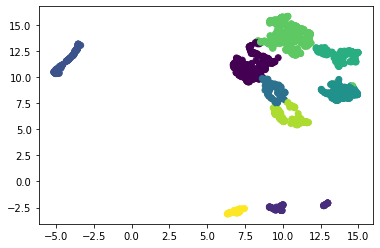

In [51]:
import umap
import matplotlib.pyplot as plt

n_neighbors=10
min_dist=0.0
n_components=2
metric='euclidean'
metric='canberra'

fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        verbose=True
    )
embedding = fit.fit_transform(df);

plt.scatter(embedding[:,0], embedding[:,1],c=kmeans.labels_)
plt.show()

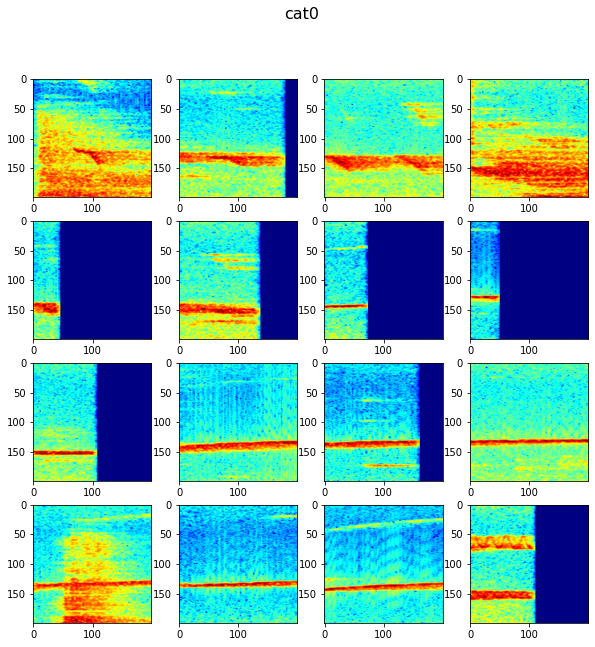

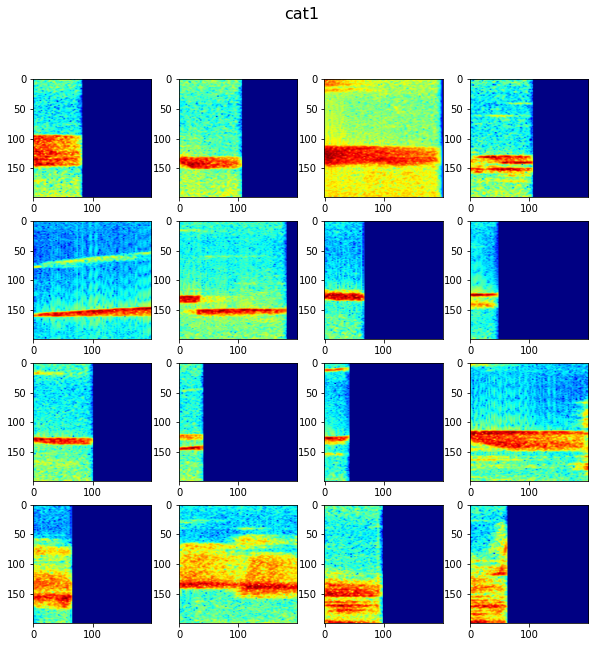

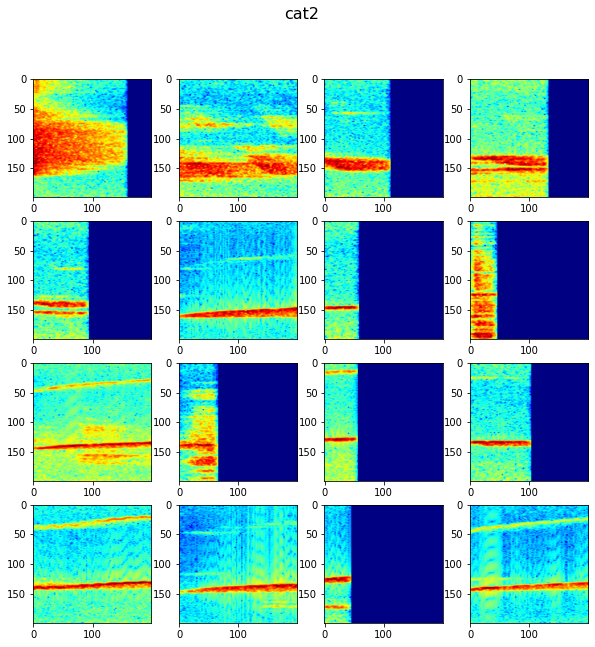

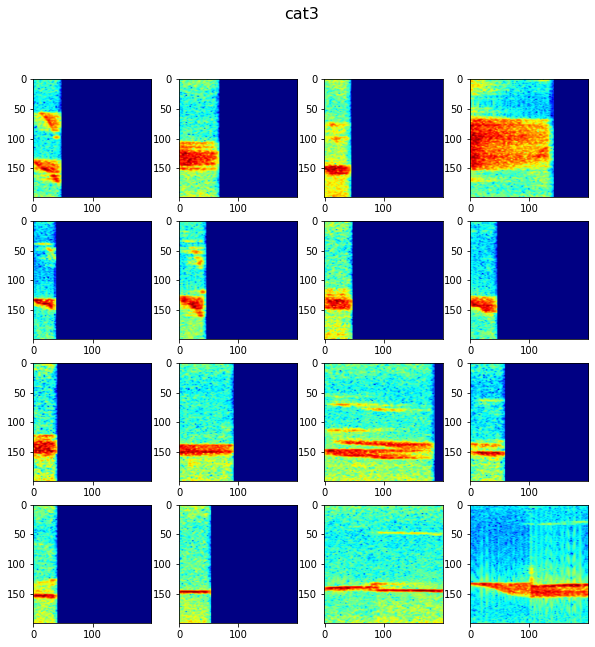

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for z in range(n_cl):
    apples = []
    for index, f in enumerate(kmeans.labels_):
        if (f == z):
            apples.append(index)
                
    fig=plt.figure(figsize=(10, 10))
    fig.suptitle('cat'+ str(z), fontsize=16)
    columns = 4
    rows = 4
    for i in range(columns*rows):        
        img=mpimg.imread('/Users/rogierlandman/from_Samsung/spec_images_syllables_features/im'+str(apples[i]).zfill(4)+'.png')
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img)
    plt.show()
